# Requirements and Setup
 It will take a while to install all the dependencies and expect around 20min to run this demo on this Google Colab

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
%env FORCE_CUDA=1
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install pyyaml==5.1 pycocotools>=2.0.1
!pip install -U fvcore
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
!pip install 'git+https://github.com/facebookresearch/pytorch3d.git'

## Imports and checking installation parameters(python 3.6.9, cuda 10.1)

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available(),torch.cuda.device_count())
!gcc --version
!python --version
!nvcc --version
!nvidia-smi
!python -m detectron2.utils.collect_env

## Installing meshrcnn
It will create a folder structure on your left in which you can navigate


In [ ]:
!git clone https://github.com/facebookresearch/meshrcnn.git
!cd meshrcnn && pip install -e .

# Loading Pix3D Dataset
Also this import will take a while since it is loading the entire dataset 3.5GB


In [ ]:
# pix3d data
!./meshrcnn/datasets/pix3d/download_pix3d.sh

In [ ]:
from google.colab import files
uploaded = files.upload()  # import a sofa from your computer and name it test.jpg

## Demo (Inference)

In [ ]:
# Running Demo on random image of the pix3d dataset, change according to your need (change 'test.jpg' to your file name)
# Be sure to upload the file on the correct folder

!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/test.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

# Visualize the Picture Uploaded and the Segmentation Mask 

In [ ]:
filename = 'test.jpg' #check the name is the same as the file you uploaded
maskname = '0_mask_sofa_1.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

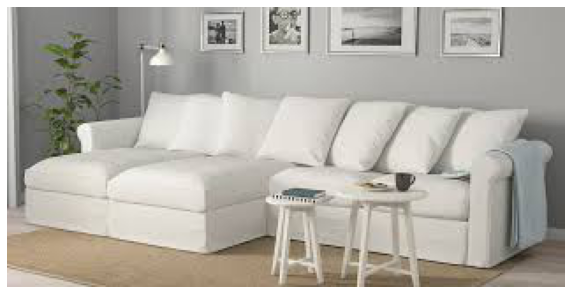

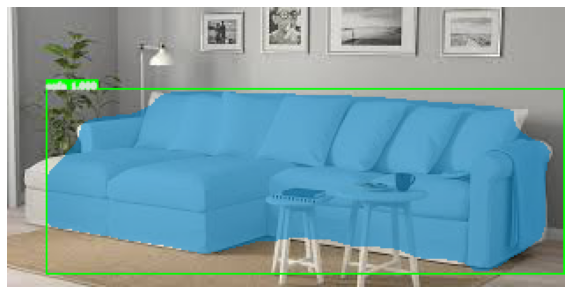

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/output_demo/test/" + maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

# Download the .obj file

In [ ]:
name = 'sofa' # change file name accordingly

In [ ]:
from google.colab import files
files.download('/content/output_demo/test/0_mesh_'+ name + '_1.000.obj')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>